In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import classification_report, accuracy_score

sys.path.append('..')

from seismicpro.batchflow import Dataset, DatasetIndex, Pipeline, B, V, F

from seismicpro.src import (SeismicBatch, FieldIndex, TraceIndex, KNNIndex, CustomIndex,
                            seismic_plot, spectrum_plot, merge_segy_files)

In [5]:
path_raw = '/notebooks/egor/noise_dataset_1/DN02A_LIFT_AMPSCAL.sgy'
path_lift = '/notebooks/egor/noise_dataset_1/DN02B_SHOTS_LIFT1.sgy'

index1 = (FieldIndex(name='raw', extra_headers=['offset'], path=path_raw)
          .merge(FieldIndex(name='lift', path=path_lift)))
index1.head()

,offset,TraceNumber,TRACE_SEQUENCE_FILE,file_id,TRACE_SEQUENCE_FILE,file_id
,,,raw,raw,lift,lift
FieldRecord,,,,,,
111906,35,1656,1,/notebooks/egor/noise_dataset_1/DN02A_LIFT_AMP...,1,/notebooks/egor/noise_dataset_1/DN02B_SHOTS_LI...
111906,36,1657,2,/notebooks/egor/noise_dataset_1/DN02A_LIFT_AMP...,2,/notebooks/egor/noise_dataset_1/DN02B_SHOTS_LI...
111906,78,1655,3,/notebooks/egor/noise_dataset_1/DN02A_LIFT_AMP...,3,/notebooks/egor/noise_dataset_1/DN02B_SHOTS_LI...
111906,79,1658,4,/notebooks/egor/noise_dataset_1/DN02A_LIFT_AMP...,4,/notebooks/egor/noise_dataset_1/DN02B_SHOTS_LI...
111906,127,1654,5,/notebooks/egor/noise_dataset_1/DN02A_LIFT_AMP...,5,/notebooks/egor/noise_dataset_1/DN02B_SHOTS_LI...


In [3]:
path_raw = '/notebooks/egor/noise_dataset_2/D01_for_Lift.sgy'
path_lift = '/notebooks/egor/noise_dataset_2/D02_Lift_SP.sgy'

index2 = (FieldIndex(name='raw', extra_headers=['offset'], path=path_raw)
          .merge(FieldIndex(name='lift', path=path_lift)))
index2.head()

,offset,TraceNumber,TRACE_SEQUENCE_FILE,file_id,TRACE_SEQUENCE_FILE,file_id
,,,raw,raw,lift,lift
FieldRecord,,,,,,
3370,35,473,1,/notebooks/egor/noise_dataset_2/D01_for_Lift.sgy,1,/notebooks/egor/noise_dataset_2/D02_Lift_SP.sgy
3370,36,472,2,/notebooks/egor/noise_dataset_2/D01_for_Lift.sgy,2,/notebooks/egor/noise_dataset_2/D02_Lift_SP.sgy
3370,79,471,3,/notebooks/egor/noise_dataset_2/D01_for_Lift.sgy,3,/notebooks/egor/noise_dataset_2/D02_Lift_SP.sgy
3370,79,474,4,/notebooks/egor/noise_dataset_2/D01_for_Lift.sgy,4,/notebooks/egor/noise_dataset_2/D02_Lift_SP.sgy
3370,127,470,5,/notebooks/egor/noise_dataset_2/D01_for_Lift.sgy,5,/notebooks/egor/noise_dataset_2/D02_Lift_SP.sgy


In [2]:
path_raw = '/notebooks/egor/noise_dataset_3/5_NA-gr_input_raw.sgy'
path_lift = '/notebooks/egor/noise_dataset_3/5_NA-gr_output_lift5.sgy'

index3 = (FieldIndex(name='raw', extra_headers=['offset'], path=path_raw)
          .merge(FieldIndex(name='lift', path=path_lift)))
index3.head()

,offset,TraceNumber,TRACE_SEQUENCE_FILE,file_id,TRACE_SEQUENCE_FILE,file_id
,,,raw,raw,lift,lift
FieldRecord,,,,,,
10407,79,1956,1,/notebooks/egor/noise_dataset_3/5_NA-gr_input_...,1,/notebooks/egor/noise_dataset_3/5_NA-gr_output...
10407,3347,623,2215,/notebooks/egor/noise_dataset_3/5_NA-gr_input_...,2215,/notebooks/egor/noise_dataset_3/5_NA-gr_output...
10407,3348,698,2216,/notebooks/egor/noise_dataset_3/5_NA-gr_input_...,2216,/notebooks/egor/noise_dataset_3/5_NA-gr_output...
10407,3348,1037,2217,/notebooks/egor/noise_dataset_3/5_NA-gr_input_...,2217,/notebooks/egor/noise_dataset_3/5_NA-gr_output...
10407,3348,1148,2218,/notebooks/egor/noise_dataset_3/5_NA-gr_input_...,2218,/notebooks/egor/noise_dataset_3/5_NA-gr_output...


In [6]:
batch1 = (Dataset(index1, SeismicBatch).next_batch(5)
         .load(fmt='sgy', components=('raw', 'lift'))
         .sort_traces(src=('raw', 'lift'), dst=('raw', 'lift'), sort_by='offset')
          )

batch2 = (Dataset(index2, SeismicBatch).next_batch(5)
         .load(fmt='sgy', components=('raw', 'lift'))
         .sort_traces(src=('raw', 'lift'), dst=('raw', 'lift'), sort_by='offset')
          )

batch3 = (Dataset(index3, SeismicBatch).next_batch(5)
         .load(fmt='sgy', components=('raw', 'lift'))
         .sort_traces(src=('raw', 'lift'), dst=('raw', 'lift'), sort_by='offset')
          )

In [69]:
def get_statistics(arr):
    stats = []
    stats.append(np.mean(abs(arr), axis=1))
    stats.append(np.median(abs(arr), axis=1))
    stats.append(np.max(abs(arr), axis=1))
    stats.append(np.std(abs(arr), axis=1))
    stats.append(np.std(arr, axis=1))
    stats.append(np.sqrt(np.sum(arr**2, axis=1) / arr.shape[1]))
    return np.array(stats).T

In [70]:
stats1 = get_statistics(np.vstack(batch1.raw))
stats2 = get_statistics(np.vstack(batch2.raw))
stats3 = get_statistics(np.vstack(batch3.raw))

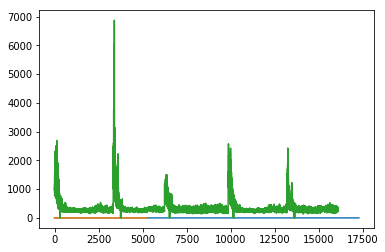

In [72]:
plt.plot(stats1[:, 0])
plt.plot(stats2[:, 0])
plt.plot(stats3[:, 0])
plt.show()

In [102]:
data = np.vstack([stats1, stats2, stats3])

In [105]:
coef1 = 1
coef2 = 2
coef3 = 1 / 1000
coefs = [coef1] * len(stats1) + [coef2] * len(stats2) + [coef3] * len(stats3)
coefs = np.array(coefs).reshape((-1, 1))

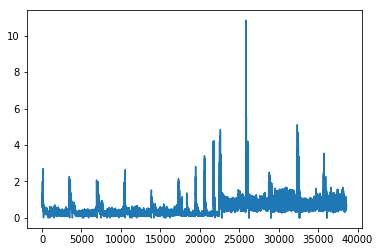

In [106]:
plt.plot((data * coefs)[:, 5])
plt.show()

In [108]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=10)

# coef1 = 1
# coef2 = 4
# coef3 = 0.001
coefs = [coef1] * len(stats1) + [coef2] * len(stats2) + [coef3] * len(stats3)
coefs = np.array(coefs).reshape((-1, 1))
labels = [0] * len(stats1) + [1] * len(stats2) + [2] * len(stats3)

model.fit((data * coefs), labels)

print(classification_report(labels, model.predict((data * coefs))))
print(accuracy_score(labels, model.predict((data * coefs))))

             precision    recall  f1-score   support

          0       0.86      0.93      0.89     17280
          1       0.80      0.55      0.65      5200
          2       0.96      0.97      0.97     16101

avg / total       0.89      0.90      0.89     38581

0.8953889220082424


Align D1 and D2

In [118]:
a = stats1
b = stats2

data = np.vstack([a, b])
labels = [0] * len(a) + [1] * len(b)
grid = np.arange(1, 4, 0.1)

res = []
for coef in grid:
    coefs = [1] * len(a) + [coef] * len(b)
    coefs = np.array(coefs).reshape((-1, 1))
    model = RandomForestClassifier(n_estimators=100, max_depth=10)
    model.fit((data * coefs), labels)
    res.append(accuracy_score(labels, model.predict((data * coefs))))

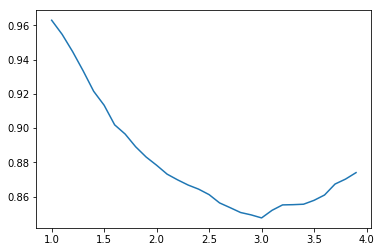

In [119]:
plt.plot(grid, res)
plt.show()

In [120]:
print(grid[np.argmin(res)])

3.0000000000000018


Align D1 and D3

In [115]:
a = stats1
b = stats3

data = np.vstack([a, b])
labels = [0] * len(a) + [1] * len(b)
grid = np.arange(0.0002, 0.0006, 0.00001)

res = []
for coef in grid:
    coefs = [1] * len(a) + [coef] * len(b)
    coefs = np.array(coefs).reshape((-1, 1))
    model = RandomForestClassifier(n_estimators=100, max_depth=10)
    model.fit((data * coefs), labels)
    res.append(accuracy_score(labels, model.predict((data * coefs))))

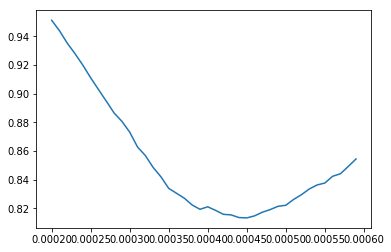

In [116]:
plt.plot(grid, res)
plt.show()

In [117]:
print(grid[np.argmin(res)])

0.00045


In [122]:
model = RandomForestClassifier(n_estimators=100, max_depth=10)

data = np.vstack([stats1, stats2, stats3])

coef1 = 1
coef2 = 3
coef3 = 0.00045
coefs = [coef1] * len(stats1) + [coef2] * len(stats2) + [coef3] * len(stats3)
coefs = np.array(coefs).reshape((-1, 1))
labels = [0] * len(stats1) + [1] * len(stats2) + [2] * len(stats3)

model.fit((data * coefs), labels)

print(classification_report(labels, model.predict((data * coefs))))
print(accuracy_score(labels, model.predict((data * coefs))))

             precision    recall  f1-score   support

          0       0.71      0.78      0.74     17280
          1       0.77      0.34      0.47      5200
          2       0.76      0.81      0.79     16101

avg / total       0.74      0.74      0.72     38581

0.7357248386511496


Align D2 and D3

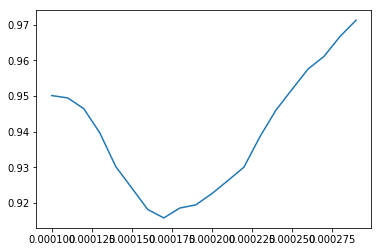

In [111]:
a = stats2
b = stats3

data = np.vstack([a, b])
labels = [0] * len(a) + [1] * len(b)
grid = np.arange(0.0001, 0.0003, 0.00001)

res = []
for coef in grid:
    coefs = [1] * len(a) + [coef] * len(b)
    coefs = np.array(coefs).reshape((-1, 1))
    model = RandomForestClassifier(n_estimators=100, max_depth=10)
    model.fit((data * coefs), labels)
    res.append(accuracy_score(labels, model.predict((data * coefs))))

plt.plot(grid, res)
plt.show()

In [113]:
print(grid[np.argmin(res)])

0.00017


In [123]:
0.00045 / 3

0.00015